In [1]:
#import libraries
import requests
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [7]:
from api_keys import API_KEY

In [2]:
#Keys
CHANNEL_ID = "UCr6n2gOy_WwuXFm-YjC28GQ" #TheSmithPlays
#CHANNEL_ID = "UCWyPmQ5E-Bh1-RPZ-zsLnLQ"

In [3]:
#visualize the json output
url_channel_stats = "https://www.googleapis.com/youtube/v3/channels?id="+CHANNEL_ID+"&part=snippet,statistics&key="+API_KEY
response_channel_stats = requests.get(url_channel_stats).json()
print(json.dumps(response_channel_stats, indent=4))

{
    "kind": "youtube#channelListResponse",
    "etag": "D6OHryvr3F4qx0HPW-Nd8R6HBXI",
    "pageInfo": {
        "totalResults": 1,
        "resultsPerPage": 5
    },
    "items": [
        {
            "kind": "youtube#channel",
            "etag": "wJV5GPLgZaZ0IDLktxpCC0c4g5U",
            "id": "UCr6n2gOy_WwuXFm-YjC28GQ",
            "snippet": {
                "title": "TheSmithPlays",
                "description": "The zombies (and also fortnite) guy",
                "customUrl": "@thesmithplays",
                "publishedAt": "2011-11-27T15:40:24Z",
                "thumbnails": {
                    "default": {
                        "url": "https://yt3.ggpht.com/oLto-BfHoXviCP52YoZyDeu7gk6CTmwAuPuUi-Zf_5fEaAFuVU2QQevR3uma2U27O38cHT0SiA=s88-c-k-c0x00ffffff-no-rj",
                        "width": 88,
                        "height": 88
                    },
                    "medium": {
                        "url": "https://yt3.ggpht.com/oLto-BfHoXviCP52YoZyDeu7gk6

In [4]:
def get_channel_details(CHANNEL_ID):

    url_channel_stats = "https://www.googleapis.com/youtube/v3/channels?id="+CHANNEL_ID+"&part=snippet,statistics&key="+API_KEY
    response_channel_stats = requests.get(url_channel_stats).json()

    data = dict(channel_title = response_channel_stats['items'][0]['snippet']['title'],
                publish_date = response_channel_stats['items'][0]['snippet']['publishedAt'],
                total_channel_views = response_channel_stats['items'][0]['statistics']['viewCount'],
                subscriber_count = response_channel_stats['items'][0]['statistics']['subscriberCount'],
                total_channel_videos = response_channel_stats['items'][0]['statistics']['videoCount']
                )

    return data

In [5]:
channel = get_channel_details(CHANNEL_ID)
channel

{'channel_title': 'TheSmithPlays',
 'publish_date': '2011-11-27T15:40:24Z',
 'total_channel_views': '867556930',
 'subscriber_count': '2900000',
 'total_channel_videos': '2264'}

In [6]:
def get_video_details(video_id):

    #collecting view, like and comment counts
    url_video_stats = "https://www.googleapis.com/youtube/v3/videos?id="+video_id+"&part=statistics&key="+API_KEY
    response_video_stats = requests.get(url_video_stats).json()

    view_count = response_video_stats['items'][0]['statistics']['viewCount']
    like_count = response_video_stats['items'][0]['statistics']['likeCount']
    comment_count = response_video_stats['items'][0]['statistics']['commentCount']

    return view_count, like_count, comment_count

In [7]:
url = "https://www.googleapis.com/youtube/v3/search?key="+API_KEY+"&channelId="+CHANNEL_ID+"&part=snippet,id&order=date&maxResults=10000&"
response = requests.get(url).json()
print(json.dumps(response, indent=4))

{
    "kind": "youtube#searchListResponse",
    "etag": "rahO8dy9MUCIo1f3RuhqwiChQJg",
    "nextPageToken": "CDIQAA",
    "regionCode": "IT",
    "pageInfo": {
        "totalResults": 2317,
        "resultsPerPage": 50
    },
    "items": [
        {
            "kind": "youtube#searchResult",
            "etag": "Ibztpu-XTKUattLFL85VQbhLcW8",
            "id": {
                "kind": "youtube#video",
                "videoId": "zMm1elY-IiM"
            },
            "snippet": {
                "publishedAt": "2023-04-25T22:21:07Z",
                "channelId": "UCr6n2gOy_WwuXFm-YjC28GQ",
                "title": "YouTube Advice &amp; Zombies Community Talk - Smithsquad Podcast #152",
                "description": "Donate (messages text to speech): https://streamlabs.com/thesmithplays My Channels: \u27a4 Minecraft channel: ...",
                "thumbnails": {
                    "default": {
                        "url": "https://i.ytimg.com/vi/zMm1elY-IiM/default.jpg",
        

In [8]:
def get_videos(df):
    pageToken = ""
    while 1:
        url = "https://www.googleapis.com/youtube/v3/search?key="+API_KEY+"&channelId="+CHANNEL_ID+"&part=snippet,id&order=date&maxResults=10000&"+pageToken

        response = requests.get(url).json()
        time.sleep(1) #give it a second before starting the for loop
        
        for video in response['items']:
            if video['id']['kind'] == "youtube#video":
                video_id = video['id']['videoId']
                video_title = video['snippet']['title']
                video_title = str(video_title).replace("&","")
                upload_date = video['snippet']['publishedAt']
                upload_date = str(upload_date).split("T")[0]
                view_count, like_count, comment_count= get_video_details(video_id)

                df = df.append({'video_id':video_id,'video_title':video_title,
                                'upload_date':upload_date,'view_count':view_count,
                                'like_count':like_count,'comment_count':comment_count},ignore_index=True)
        try:
            if response['nextPageToken'] != None: #if none, it means it reached the last page and break out of it
                pageToken = "pageToken=" + response['nextPageToken']

        except:
            break


    return df

In [10]:
#main

#build our dataframe
df2 = pd.DataFrame(columns=["video_id","video_title","upload_date","view_count","like_count","comment_count"]) 

df2 = get_videos(df2)

C:\Users\david\AppData\Local\Temp\ipykernel_13296\1447046813.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'video_id':video_id,'video_title':video_title,
C:\Users\david\AppData\Local\Temp\ipykernel_13296\1447046813.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'video_id':video_id,'video_title':video_title,
C:\Users\david\AppData\Local\Temp\ipykernel_13296\1447046813.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'video_id':video_id,'video_title':video_title,
C:\Users\david\AppData\Local\Temp\ipykernel_13296\1447046813.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
 

In [11]:
df2

,video_id,video_title,upload_date,view_count,like_count,comment_count
0,zMm1elY-IiM,YouTube Advice amp; Zombies Community Talk - S...,2023-04-25,7156,419,23
1,o5p3V4cJ0Bc,Chatting With Viewers - Smithsquad Podcast #151,2023-04-11,8306,431,19
2,4bOSgyj4thU,I Saw The Z House Gang - Smithsquad Podcast #150,2023-04-06,11147,532,31
3,7DY0vnXIpAE,Talking About Life amp; Playing Zombies - Smit...,2023-03-06,12717,637,30
4,5Iwu8fEn5tY,Smithsquad Podcast #148,2023-02-21,12433,644,32
...,...,...,...,...,...,...
498,6KCNSWlyzmY,quot;WORSE THAN TRANZITquot; - Exo Zombies Inf...,2015-04-02,452267,9304,1361
499,PnZbdYOO6b0,How To Kill The Goliath Robot Zombie Infection...,2015-04-01,146847,2331,237
500,FUVdQY5a-ig,Ultimate Guide to Exo Zombies: Infection - Wal...,2015-03-31,171656,3683,227
501,5Yw0XDzxhaI,quot;WTF IS THISquot; - Leviathan Custom Zombi...,2015-03-29,293537,4072,369


In [12]:
# At this point the best thing to do is to connect this dataframe to a cloud database -> data refreshes 
# automatically and it is NOT saved in your local pc

In [13]:
df2.isnull().any()

video_id         False
video_title      False
upload_date      False
view_count       False
like_count       False
comment_count    False
dtype: bool

In [14]:
df2.dtypes

video_id         object
video_title      object
upload_date      object
view_count       object
like_count       object
comment_count    object
dtype: object

In [15]:
numeric_cols = ['view_count', 'like_count', 'comment_count']
df2[numeric_cols] = df2[numeric_cols].apply(pd.to_numeric, errors = 'coerce', axis =1)

In [16]:
df2.head()

,video_id,video_title,upload_date,view_count,like_count,comment_count
0,zMm1elY-IiM,YouTube Advice amp; Zombies Community Talk - S...,2023-04-25,7156,419,23
1,o5p3V4cJ0Bc,Chatting With Viewers - Smithsquad Podcast #151,2023-04-11,8306,431,19
2,4bOSgyj4thU,I Saw The Z House Gang - Smithsquad Podcast #150,2023-04-06,11147,532,31
3,7DY0vnXIpAE,Talking About Life amp; Playing Zombies - Smit...,2023-03-06,12717,637,30
4,5Iwu8fEn5tY,Smithsquad Podcast #148,2023-02-21,12433,644,32


In [24]:
#re-format dates
#df2['upload_date'] = df2['upload_date'].apply(lambda x: x.split("T")[0])

# already formatted dates

In [23]:
#EDA
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       503 non-null    object
 1   video_title    503 non-null    object
 2   upload_date    503 non-null    object
 3   view_count     503 non-null    int64 
 4   like_count     503 non-null    int64 
 5   comment_count  503 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 23.7+ KB


In [27]:
round(df2.describe(),2)

,view_count,like_count,comment_count
count,503.00,503.00,503.00
mean,568344.91,14235.59,2046.64
std,747357.09,14981.42,2911.45
min,7156.00,419.00,19.00
25%,200853.00,5676.50,545.50
50%,359774.00,11472.00,1184.00
75%,693391.50,18028.50,2302.00
max,7326356.00,134812.00,26861.00


In [28]:
df2.isnull().sum()

video_id         0
video_title      0
upload_date      0
view_count       0
like_count       0
comment_count    0
dtype: int64

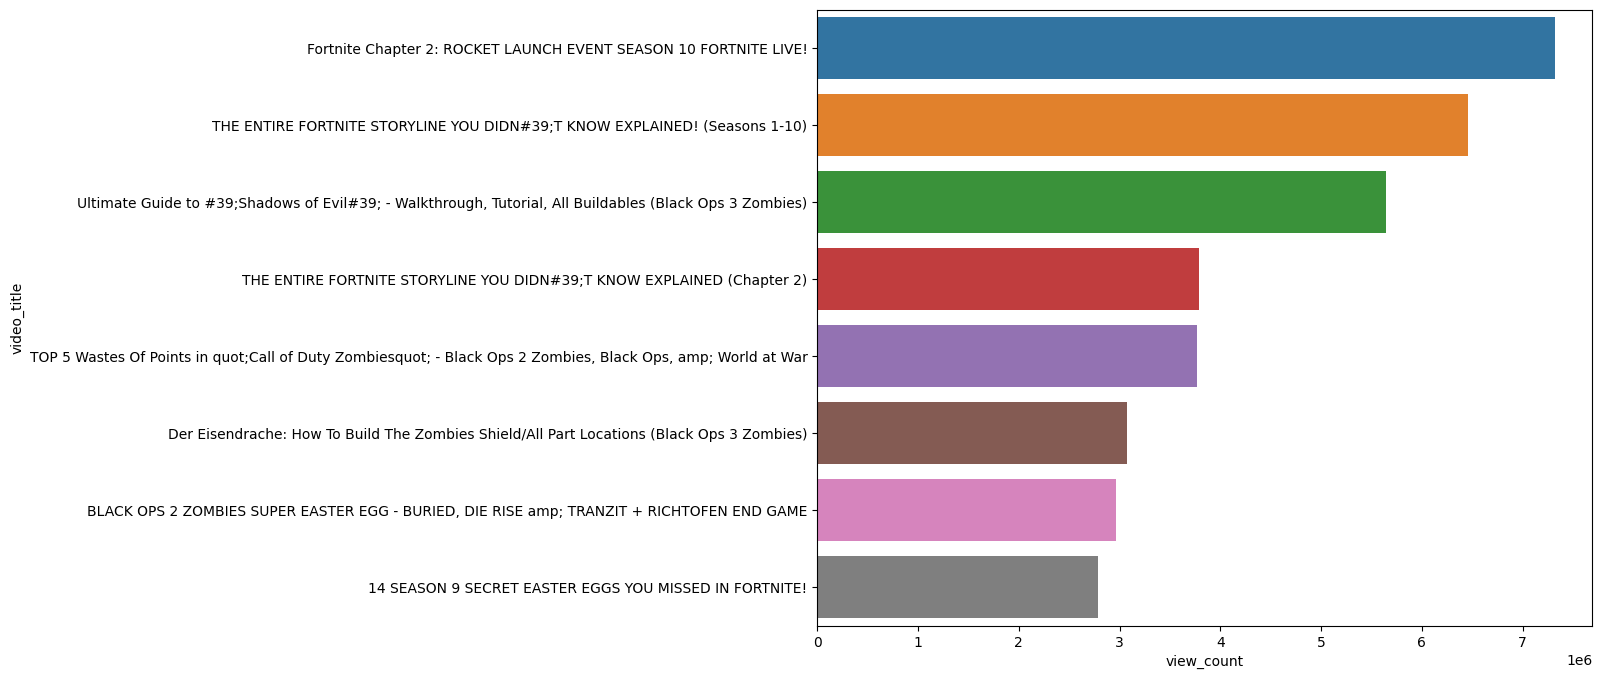

In [29]:
#best performing videos:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='view_count', y='video_title', data = df2.sort_values('view_count', ascending=False)[0:9])

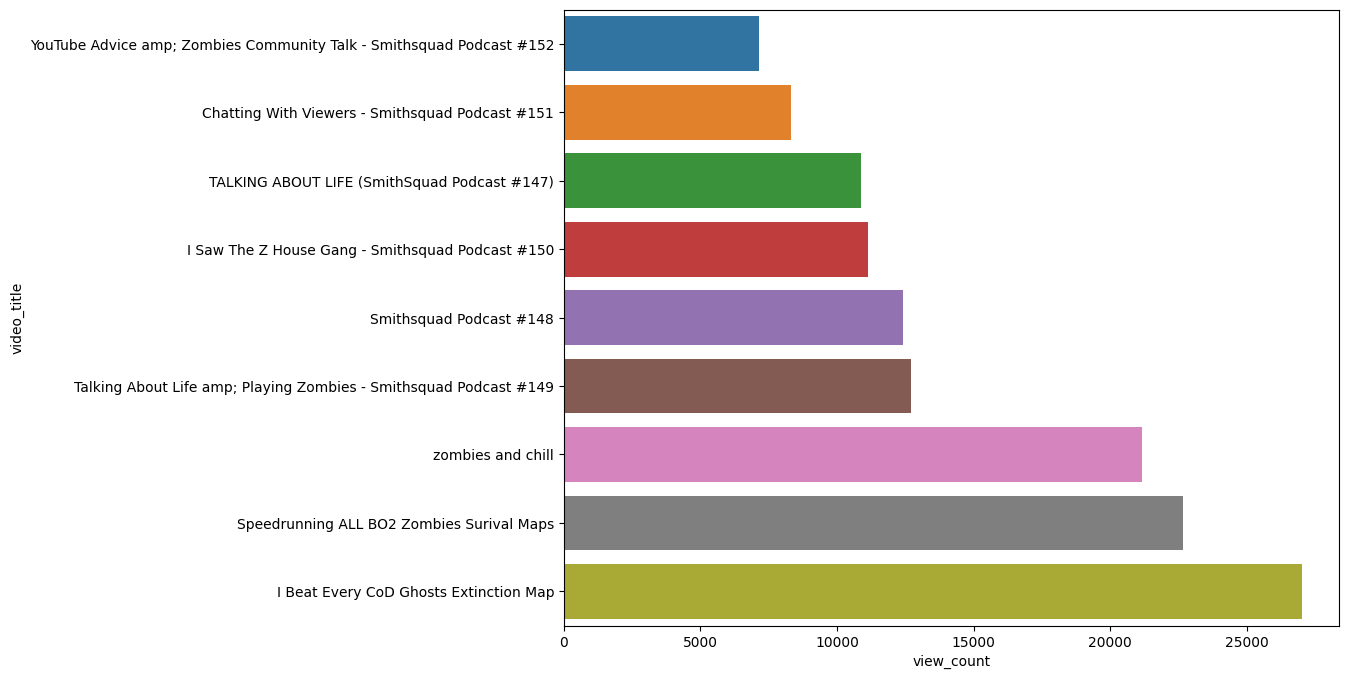

In [30]:
#worst videos
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='view_count', y='video_title', data = df2.sort_values('view_count', ascending=True)[0:9])

<AxesSubplot: >

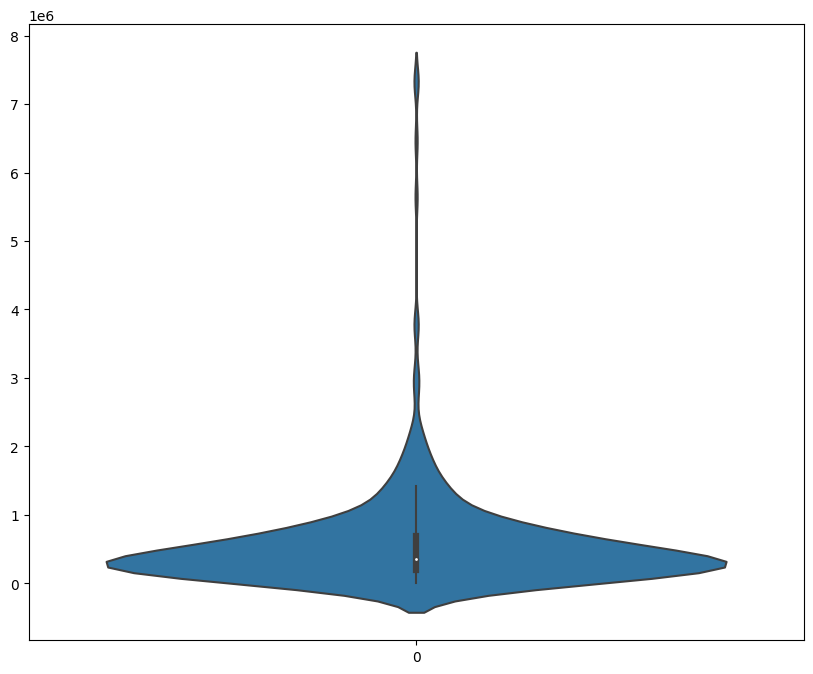

In [31]:
#view distribution per video, useful also to compare different channels
plt.figure(figsize=(10, 8))
sns.violinplot(df2['view_count'])

In [32]:
#in fact
df2['view_count'].mean()

568344.9125248509

In [34]:
df2[numeric_cols]

,view_count,like_count,comment_count
0,7156,419,23
1,8306,431,19
2,11147,532,31
3,12717,637,30
4,12433,644,32
...,...,...,...
498,452267,9304,1361
499,146847,2331,237
500,171656,3683,227
501,293537,4072,369


<AxesSubplot: >

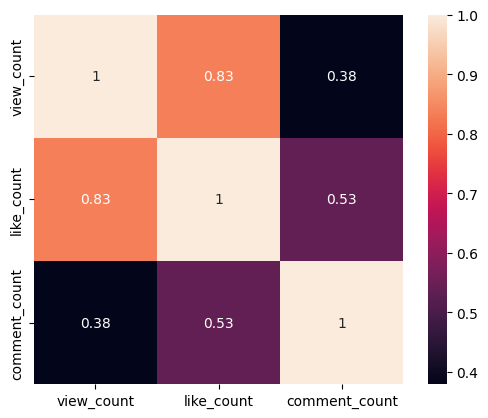

In [35]:
sns.heatmap(df2[numeric_cols].corr(), square=True, annot=True)
#high correlation between views, comments and likes

<AxesSubplot: xlabel='like_count', ylabel='view_count'>

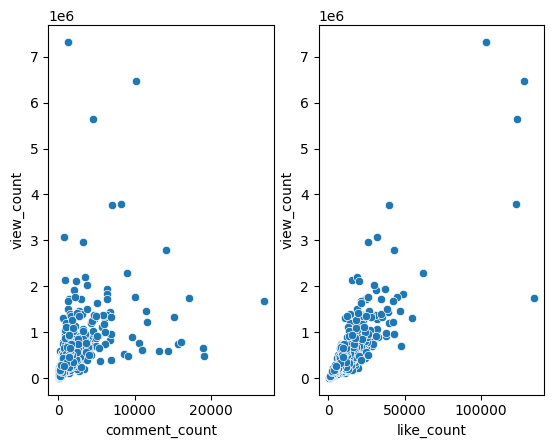

In [36]:
#views vs likes, comments high correlation
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = df2, x='comment_count', y ='view_count', ax =ax[0])
sns.scatterplot(data = df2, x='like_count', y ='view_count', ax =ax[1])

#positive correlation -> the more views, the more comments and likes